## Diagnostic

In [22]:
# execute this cell when you want to free up the memory!
import gc
gc.collect()

85

#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modules import Annotations, Samples, Sequencing
import glob

## Step 1: Data Preprocessing

In [2]:
samples = Samples.Samples()
samples.load_data(glob.glob('data/*.txt'))

annotations = Annotations.Annotations()
annotations.load_annotations("data/GSE124439_family.xml")

sequencing = Sequencing.Sequencing(samples=samples, annotations=annotations)

Annotations loaded. Action accomplished with %d errors inside %d files.


In [3]:
# Printing both samples and genes count grouped by sample.
pd.merge(left=annotations.get_annotations(), right=samples.get_samples(), left_index=True, right_index=True)

,cns subregion,sample group,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533230,Frontal Cortex,ALS Spectrum MND,42,149,0,3327,101,78,4,0,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,Frontal Cortex,ALS Spectrum MND,25,107,2,1787,153,109,2,1,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,Frontal Cortex,ALS Spectrum MND,20,95,0,1830,121,127,1,1,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,Frontal Cortex,ALS Spectrum MND,22,101,0,2131,142,143,5,1,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,Frontal Cortex,ALS Spectrum MND,22,102,0,1706,83,178,1,3,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,Frontal Cortex,ALS Spectrum MND,23,113,0,2130,72,71,2,3,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,Frontal Cortex,ALS Spectrum MND,134,300,0,6077,171,42,8,5,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,Frontal Cortex,ALS Spectrum MND,64,290,0,4752,118,174,8,2,...,623,1466,1246,726,61,358,107,347,1284,1469
GSM3533404,Frontal Cortex,ALS Spectrum MND,124,332,0,3516,141,173,3,2,...,743,1846,1680,936,110,479,120,503,1646,1839


## Step 2: Descriptive Analysis

### Sample Description

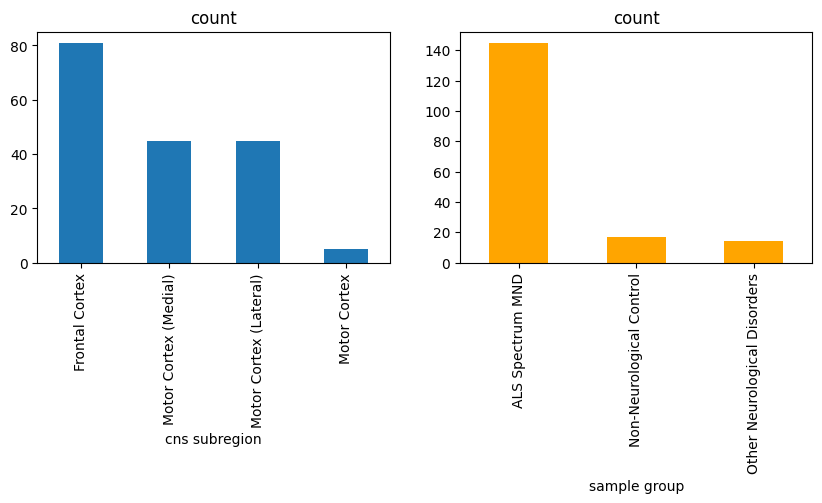

In [4]:
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize=(10,3))

sample_source = annotations.get_annotations_column("cns subregion").value_counts().plot.bar(ax=ax0, subplots=True)
disease_group = annotations.get_annotations_column("sample group").value_counts().plot.bar(ax=ax1, subplots=True, color="orange")

<Axes: title={'center': 'Standard Deviation'}, ylabel='Frequency'>

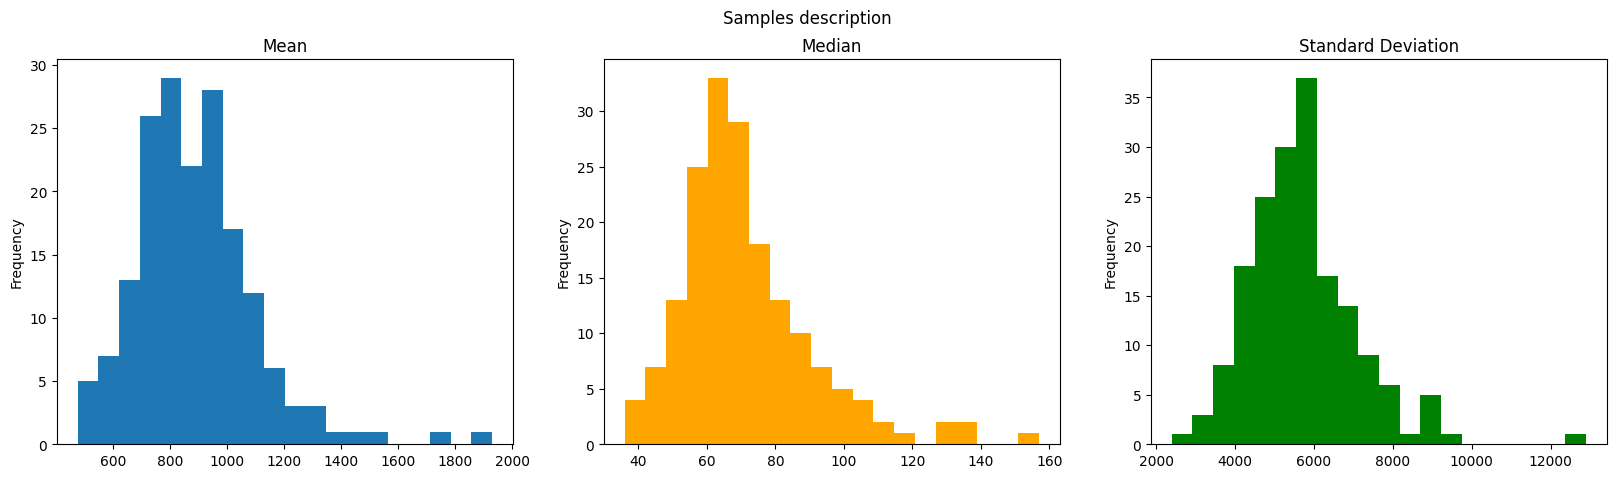

In [5]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, figsize=(20,5))

fig.suptitle("Samples description")

ax0.set_title("Mean")
samples.get_samples().mean(axis=1).plot.hist(ax=ax0, bins=20)

ax1.set_title("Median")
samples.get_samples().median(axis=1).plot.hist(ax=ax1, bins=20, color="orange")

ax2.set_title("Standard Deviation")
samples.get_samples().std(axis=1).plot.hist(ax=ax2, bins=20, color="green")

### RNA Count Description

<Axes: title={'center': 'Standard Deviation'}, ylabel='Frequency'>

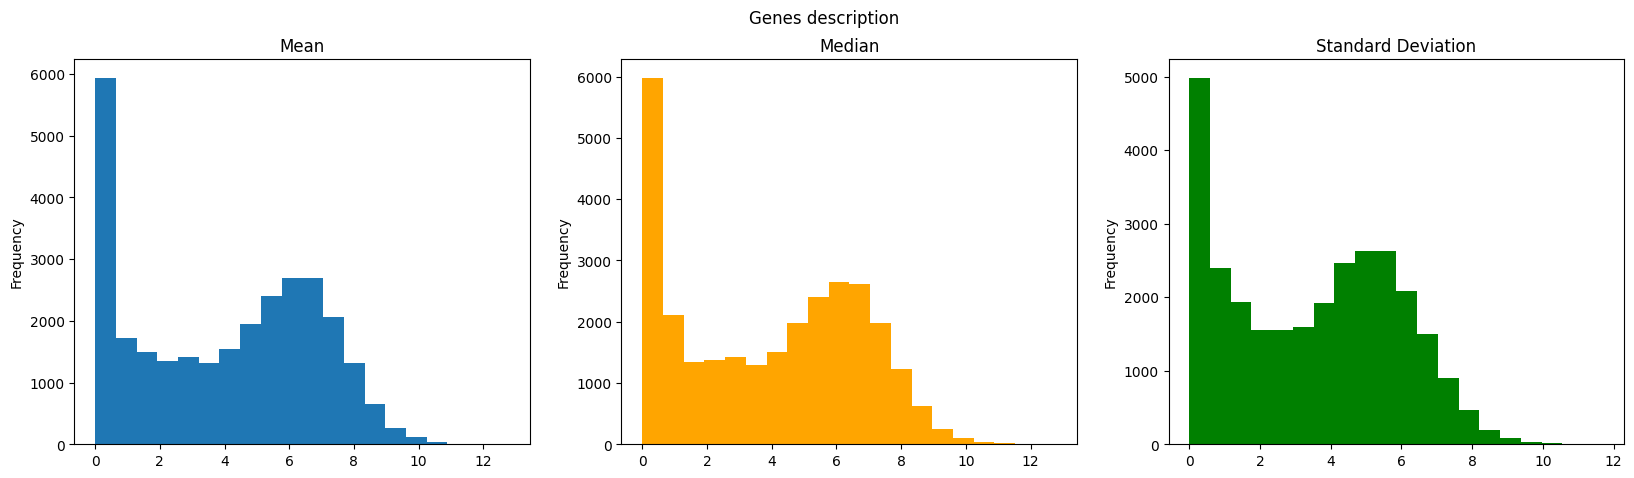

In [6]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, figsize=(20,5))

fig.suptitle("Genes description")

ax0.set_title("Mean")
Samples.Samples.log_transform_df(samples.get_samples().mean(axis=0)).plot.hist(ax=ax0, bins=20)

ax1.set_title("Median")
Samples.Samples.log_transform_df(samples.get_samples().median(axis=0)).plot.hist(ax=ax1, bins=20, color="orange")

ax2.set_title("Standard Deviation")
Samples.Samples.log_transform_df(samples.get_samples().std(axis=0)).plot.hist(ax=ax2, bins=20, color="green")

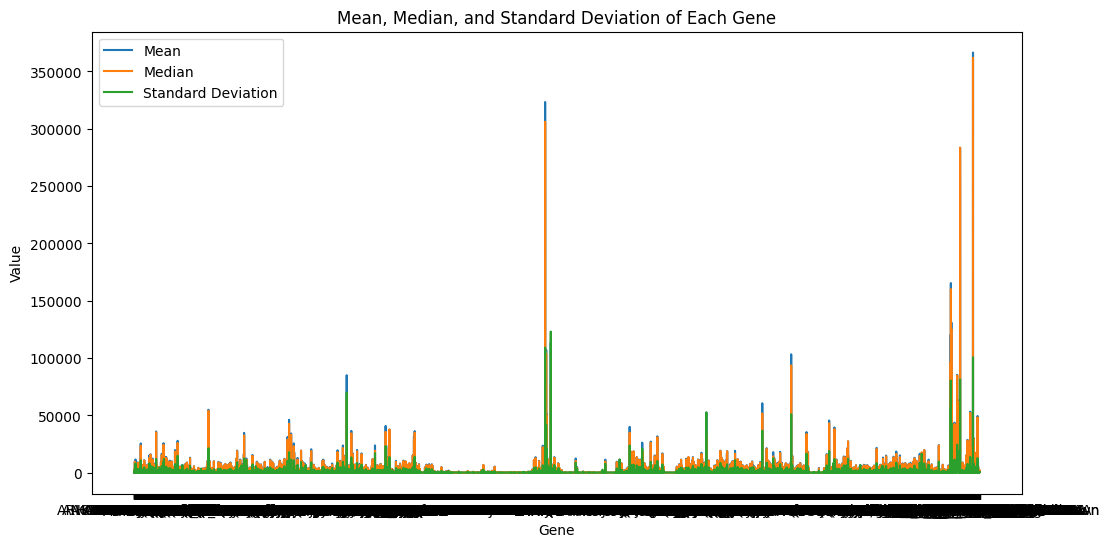

In [32]:
def get_mean_median_std() -> None:
    plt.figure(figsize=(12, 6))

    plt.plot(samples.get_samples().mean(), label='Mean')
    plt.plot(samples.get_samples().median(), label='Median')
    plt.plot(samples.get_samples().std(), label='Standard Deviation')

    plt.legend(loc='best')
    plt.title('Mean, Median, and Standard Deviation of Each Gene')
    plt.xlabel('Gene')
    plt.ylabel('Value')

    plt.show()
    return

get_mean_median_std()

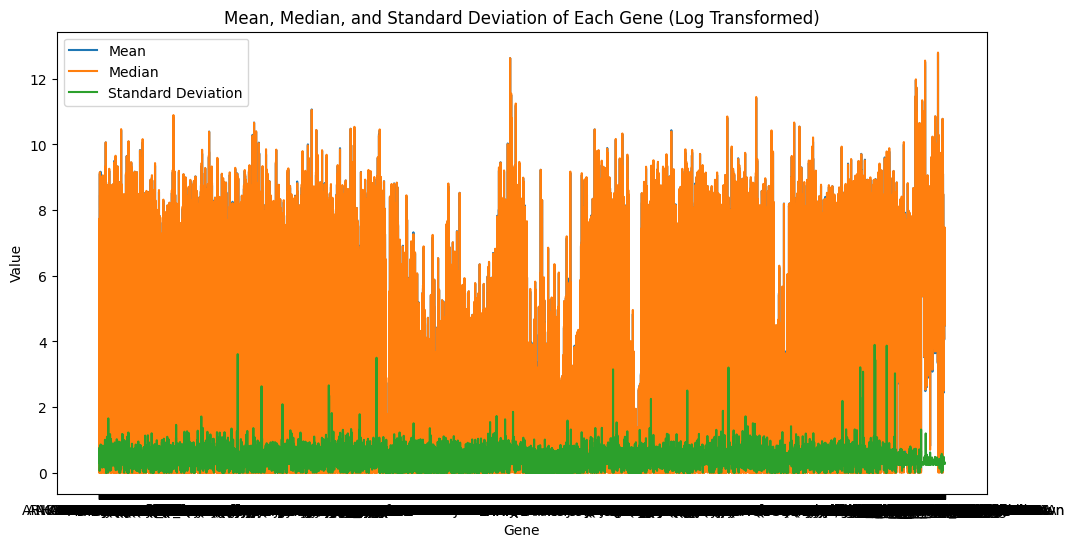

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533382,3.761200,5.247024,0.0,8.307213,4.532599,5.308268,0.693147,2.197225,4.343805,0.693147,...,6.931472,7.768110,7.667626,7.143618,4.615121,6.410175,4.948760,6.313548,7.727535,7.711549
GSM3533252,3.637586,4.709530,0.0,8.446985,4.634729,4.174387,2.079442,0.693147,4.234107,0.000000,...,6.781058,7.639161,7.554335,6.978214,4.787492,6.171701,4.867534,6.265301,7.507690,7.561122
GSM3533337,3.465736,4.709530,0.0,7.303170,4.442651,4.110874,0.693147,0.693147,2.564949,0.000000,...,6.487684,7.213768,7.204893,6.620073,4.127134,5.834811,4.634729,5.849325,7.023759,7.271009
GSM3533314,2.708050,3.737670,0.0,7.689829,4.663439,5.293305,1.609438,0.000000,3.218876,0.000000,...,6.865891,7.609862,7.505492,6.992096,4.605170,6.269096,4.983607,6.102559,7.328437,7.471932
GSM3533391,3.637586,4.779123,0.0,7.127694,4.653960,5.129899,0.693147,0.693147,3.091042,0.693147,...,6.742881,7.508239,7.393878,6.806829,4.574711,6.159095,4.795791,6.030685,7.350516,7.478170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533291,3.401197,4.962845,0.0,7.265430,4.634729,4.753590,1.098612,1.609438,2.708050,0.693147,...,6.510258,7.331060,7.185387,6.601230,4.454347,5.978886,4.532599,5.802118,7.154615,7.250636
GSM3533349,3.465736,4.962845,0.0,7.331060,4.691348,4.812184,1.098612,0.693147,4.941642,0.000000,...,6.632002,7.452982,7.362645,6.765039,4.343805,6.059123,4.812184,6.066108,7.299121,7.415175
GSM3533339,3.688879,4.564348,0.0,7.109879,4.317488,4.499810,0.693147,1.386294,3.688879,0.000000,...,6.533789,7.261927,7.201171,6.542472,4.624973,5.872118,4.430817,5.707110,7.044033,7.237778
GSM3533399,3.850148,5.192957,0.0,7.972466,4.499810,4.700480,0.693147,1.945910,3.850148,0.693147,...,6.680855,7.435438,7.305860,6.768493,4.499810,6.152733,4.605170,6.093570,7.429521,7.515889


In [30]:
def log_transformation(df) -> pd.DataFrame:
    log_genes_counts = np.log1p(df)

    mean = log_genes_counts.mean()
    median = log_genes_counts.median()
    std_dev = log_genes_counts.std()

    plt.figure(figsize=(12, 6))

    plt.plot(mean, label='Mean')
    plt.plot(median, label='Median')
    plt.plot(std_dev, label='Standard Deviation')

    plt.legend(loc='best')
    plt.title('Mean, Median, and Standard Deviation of Each Gene (Log Transformed)')
    plt.xlabel('Gene')
    plt.ylabel('Value')

    plt.show()
    return

log_transformation(samples.get_samples())

## Step 3: PCA

In [7]:
samples.reduce_to_2d_per_gene()

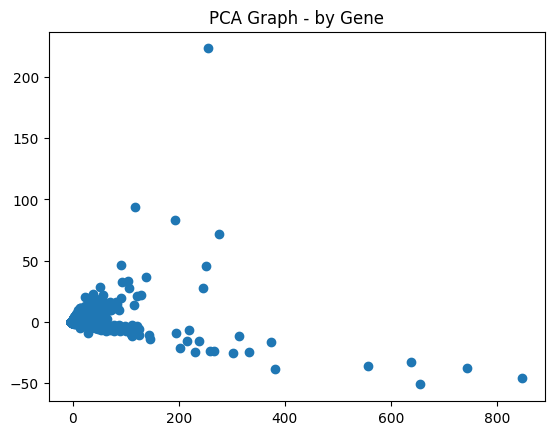

In [8]:
reduced_genes = samples.get_reduced_genes()

plt.scatter(reduced_genes.PC1, reduced_genes.PC2)
plt.title('PCA Graph - by Gene')

plt.show()

## Step 4: tSNE

In [3]:
samples.reduce_to_2d_per_gene_tSNE(3)
samples.reduce_to_2d_per_gene_tSNE(50)
samples.reduce_to_2d_per_gene_tSNE(100)

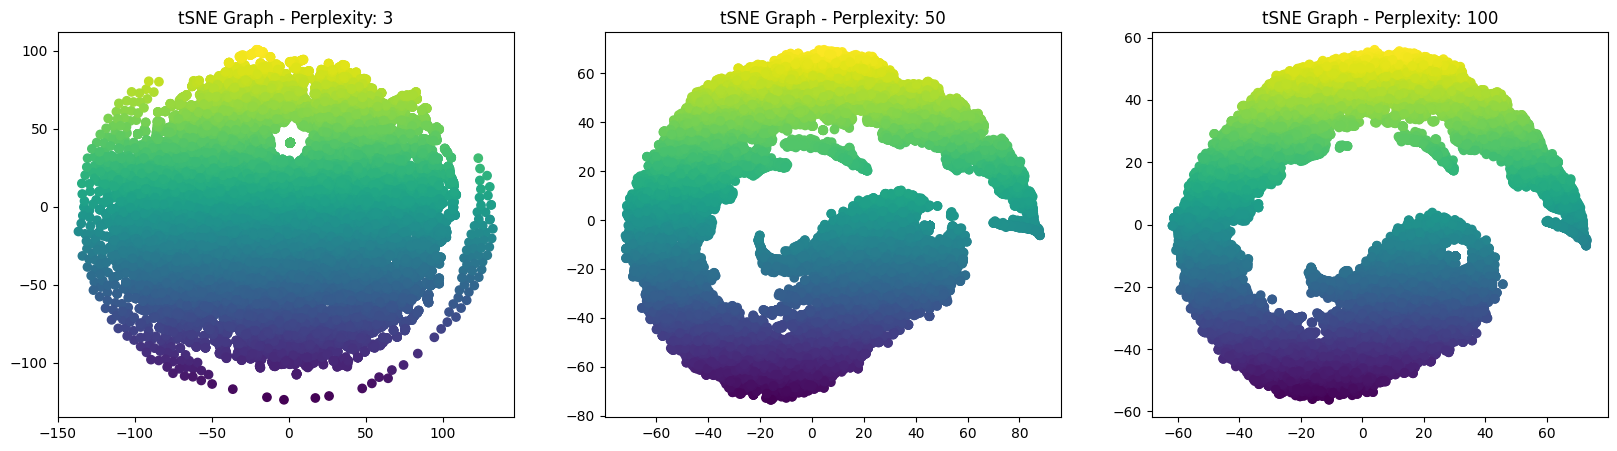

In [5]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(20,5))

reduced_genes = samples.get_reduced_genes_tSNE()

for index, (tSNE_gene_reduced, perplexity) in enumerate(reduced_genes):
    axes[index].scatter(tSNE_gene_reduced[0], tSNE_gene_reduced[1], c=tSNE_gene_reduced[1])
    axes[index].set_title(f"tSNE Graph - Perplexity: {perplexity}")

plt.show()

## Step 5: Univariate Analysis

In [48]:
annotations.get_annotations()['sample group'].value_counts()

sample group
ALS Spectrum MND                145
Non-Neurological Control         17
Other Neurological Disorders     14
Name: count, dtype: int64

In [119]:
# als_patients = annotations.get_annotations().drop()
als_patients = annotations.get_annotations()[annotations.get_annotations()["sample group"] == "ALS Spectrum MND"]
als_patients

,cns subregion,sample group
GSM3533230,Frontal Cortex,ALS Spectrum MND
GSM3533231,Frontal Cortex,ALS Spectrum MND
GSM3533232,Frontal Cortex,ALS Spectrum MND
GSM3533233,Frontal Cortex,ALS Spectrum MND
GSM3533234,Frontal Cortex,ALS Spectrum MND
...,...,...
GSM3533401,Frontal Cortex,ALS Spectrum MND
GSM3533402,Frontal Cortex,ALS Spectrum MND
GSM3533403,Frontal Cortex,ALS Spectrum MND
GSM3533404,Frontal Cortex,ALS Spectrum MND


In [3]:
healthy = annotations.get_annotations()[annotations.get_annotations()["sample group"] == "Non-Neurological Control"]
healthy

,cns subregion,sample group
GSM3533238,Frontal Cortex,Non-Neurological Control
GSM3533251,Motor Cortex (Medial),Non-Neurological Control
GSM3533259,Motor Cortex (Lateral),Non-Neurological Control
GSM3533266,Frontal Cortex,Non-Neurological Control
GSM3533272,Motor Cortex (Medial),Non-Neurological Control
GSM3533277,Motor Cortex (Lateral),Non-Neurological Control
GSM3533282,Frontal Cortex,Non-Neurological Control
GSM3533290,Motor Cortex (Medial),Non-Neurological Control
GSM3533366,Motor Cortex (Medial),Non-Neurological Control
GSM3533367,Motor Cortex (Lateral),Non-Neurological Control


In [122]:
diagnosed = annotations.get_annotations()[annotations.get_annotations()["sample group"] != "Non-Neurological Control"]
diagnosed

,cns subregion,sample group
GSM3533230,Frontal Cortex,ALS Spectrum MND
GSM3533231,Frontal Cortex,ALS Spectrum MND
GSM3533232,Frontal Cortex,ALS Spectrum MND
GSM3533233,Frontal Cortex,ALS Spectrum MND
GSM3533234,Frontal Cortex,ALS Spectrum MND
...,...,...
GSM3533401,Frontal Cortex,ALS Spectrum MND
GSM3533402,Frontal Cortex,ALS Spectrum MND
GSM3533403,Frontal Cortex,ALS Spectrum MND
GSM3533404,Frontal Cortex,ALS Spectrum MND


In [123]:
diagnosed = als_patients.merge(samples.get_samples(), left_index=True, right_index=True)
diagnosed 

,cns subregion,sample group,A1BG_x,A1BG-AS1_x,A1CF_x,A2M_x,A2M-AS1_x,A2ML1_x,A2MP1_x,A3GALT2_x,...,X6B_LINE:CR1:LINE_y,X7A_LINE:CR1:LINE_y,X7B_LINE:CR1:LINE_y,X7C_LINE:CR1:LINE_y,X7D_LINE:CR1:LINE_y,X8_LINE:CR1:LINE_y,X9_LINE:L1:LINE_y,Zaphod2:hAT-Tip100:DNA_y,Zaphod3:hAT-Tip100:DNA_y,Zaphod:hAT-Tip100:DNA_y
GSM3533230,Frontal Cortex,ALS Spectrum MND,42,149,0,3327,101,78,4,0,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,Frontal Cortex,ALS Spectrum MND,25,107,2,1787,153,109,2,1,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,Frontal Cortex,ALS Spectrum MND,20,95,0,1830,121,127,1,1,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,Frontal Cortex,ALS Spectrum MND,22,101,0,2131,142,143,5,1,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,Frontal Cortex,ALS Spectrum MND,22,102,0,1706,83,178,1,3,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,Frontal Cortex,ALS Spectrum MND,23,113,0,2130,72,71,2,3,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,Frontal Cortex,ALS Spectrum MND,134,300,0,6077,171,42,8,5,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,Frontal Cortex,ALS Spectrum MND,64,290,0,4752,118,174,8,2,...,623,1466,1246,726,61,358,107,347,1284,1469
GSM3533404,Frontal Cortex,ALS Spectrum MND,124,332,0,3516,141,173,3,2,...,743,1846,1680,936,110,479,120,503,1646,1839


In [120]:
als_patients = als_patients.merge(samples.get_samples(), left_index=True, right_index=True)
als_patients 

,cns subregion,sample group,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533230,Frontal Cortex,ALS Spectrum MND,42,149,0,3327,101,78,4,0,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,Frontal Cortex,ALS Spectrum MND,25,107,2,1787,153,109,2,1,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,Frontal Cortex,ALS Spectrum MND,20,95,0,1830,121,127,1,1,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,Frontal Cortex,ALS Spectrum MND,22,101,0,2131,142,143,5,1,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,Frontal Cortex,ALS Spectrum MND,22,102,0,1706,83,178,1,3,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,Frontal Cortex,ALS Spectrum MND,23,113,0,2130,72,71,2,3,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,Frontal Cortex,ALS Spectrum MND,134,300,0,6077,171,42,8,5,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,Frontal Cortex,ALS Spectrum MND,64,290,0,4752,118,174,8,2,...,623,1466,1246,726,61,358,107,347,1284,1469
GSM3533404,Frontal Cortex,ALS Spectrum MND,124,332,0,3516,141,173,3,2,...,743,1846,1680,936,110,479,120,503,1646,1839


In [5]:
healthy = healthy.merge(samples.get_samples(), left_index=True, right_index=True)
healthy

,cns subregion,sample group,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533238,Frontal Cortex,Non-Neurological Control,34,84,0,677,45,95,1,1,...,651,1317,1188,687,63,313,54,321,1330,1545
GSM3533251,Motor Cortex (Medial),Non-Neurological Control,109,154,0,2560,136,117,4,4,...,557,1437,1284,834,80,319,88,315,1032,1164
GSM3533259,Motor Cortex (Lateral),Non-Neurological Control,63,128,0,1984,76,76,2,1,...,623,1599,1448,838,57,416,78,395,1532,1604
GSM3533266,Frontal Cortex,Non-Neurological Control,37,124,0,2452,75,122,3,5,...,884,1956,1829,954,90,493,121,431,1645,1992
GSM3533272,Motor Cortex (Medial),Non-Neurological Control,74,161,0,3094,112,154,8,4,...,889,1950,2048,979,125,543,146,390,1806,1977
GSM3533277,Motor Cortex (Lateral),Non-Neurological Control,37,95,0,2847,98,164,8,6,...,873,1785,1823,887,112,545,117,377,1569,1769
GSM3533282,Frontal Cortex,Non-Neurological Control,33,140,0,2978,119,132,0,6,...,940,2077,1986,1037,102,527,144,459,1910,2065
GSM3533290,Motor Cortex (Medial),Non-Neurological Control,16,107,0,3994,88,186,2,2,...,757,1751,1444,859,74,403,101,395,1436,1606
GSM3533366,Motor Cortex (Medial),Non-Neurological Control,20,90,0,2400,90,127,1,2,...,964,2036,1853,1023,121,589,136,557,1878,2211
GSM3533367,Motor Cortex (Lateral),Non-Neurological Control,41,145,0,4651,183,205,0,4,...,1320,3122,2731,1426,125,803,184,685,2671,2619


In [117]:
def compare_two_groups(group1, group2, label_1, label_2) -> None:
    '''
    This method plots the mean, median and standard deviation of each gene and shows the plot.
    '''
    mean_group1 = group1.drop(columns=['cns subregion', 'sample group']).mean()
    mean_group2 = group2.drop(columns=['cns subregion', 'sample group']).mean()
    # mean = self.__genes_counts.mean()
    # median = self.__genes_counts.median()
    # std_dev = self.__genes_counts.std()

    # Plot mean, median, and standard deviation
    plt.figure(figsize=(12, 6))

    plt.plot(mean_group1, label=label_1)
    plt.plot(mean_group2, label=label_2)

    # plt.plot(samples.get_samples().median(), label='Median')
    # plt.plot(samples.get_samples().std(), label='Standard Deviation')

    plt.legend(loc='best')
    plt.title('Mean')
    plt.xlabel('Gene')
    plt.ylabel('Value')

    plt.show()
    return

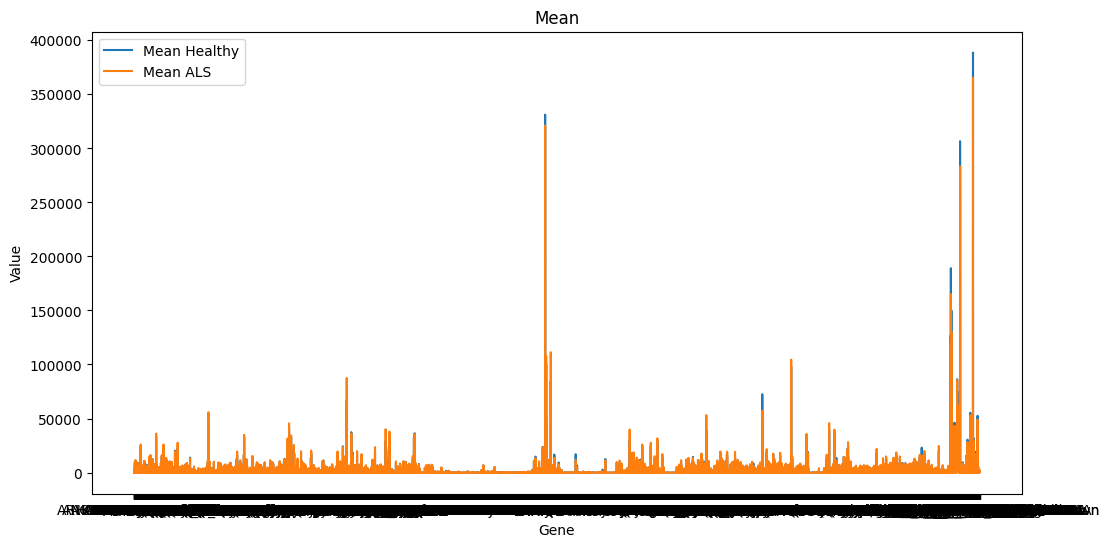

In [121]:
compare_two_groups(healthy, als_patients, "Mean Healthy", "Mean ALS")

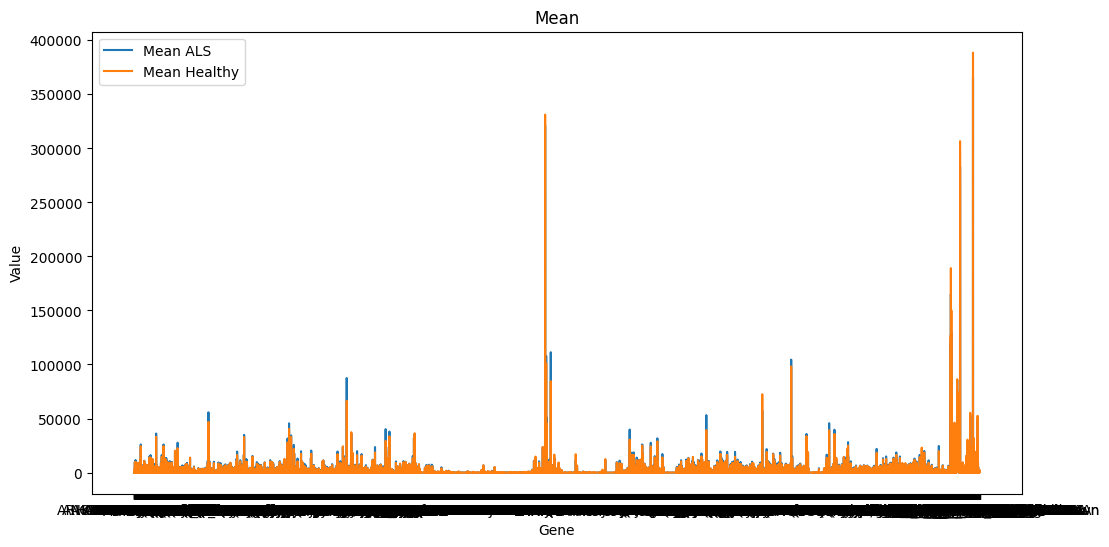

In [124]:
compare_two_groups(als_patients, healthy, "Mean ALS", "Mean Healthy")

In [125]:
compare_two_groups(healthy, diagnosed, "Mean Healthy", "Mean Diagnosed")

compare_two_groups(diagnosed, healthy, "Mean Diagnosed","Mean Healthy")

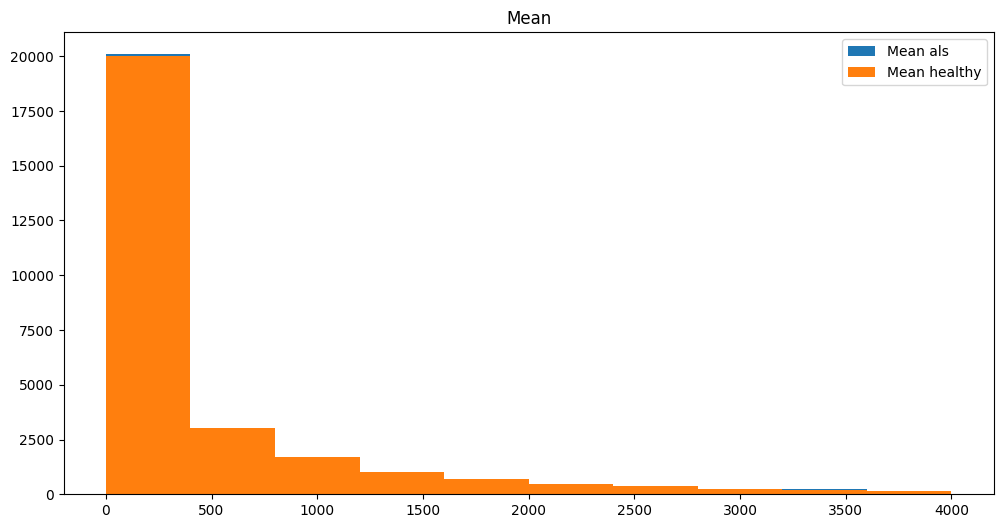

In [79]:
def compare_healthy_als_hist(healty_patients, als_patients) -> None:
    bins = 10
    mean_healthy = healty_patients.drop(columns=['cns subregion', 'sample group']).mean()
    mean_als = als_patients.drop(columns=['cns subregion', 'sample group']).mean()


    # Plot mean, median, and standard deviation
    plt.figure(figsize=(12, 6))

    plt.hist(mean_als, bins=bins, label='Mean als', range=(0, 4000))
    plt.hist(mean_healthy, bins= bins, label='Mean healthy', range=(0, 4000))



    # plt.plot(samples.get_samples().median(), label='Median')
    # plt.plot(samples.get_samples().std(), label='Standard Deviation')

    plt.legend(loc='best')
    plt.title('Mean')
    # plt.xlabel('Gene')
    # plt.ylabel('Value')

    plt.show()
    return

compare_healthy_als_hist(healthy, als_patients )

In [8]:
import pandas as pd
from pydeseq2.dds import DeseqDataSet


count_data = pd.concat([healthy, als_patients])

condition_data = ['healthy'] * len(healthy) + ['als'] * len(als_patients)

dds = DeseqDataSet(countData=count_data,
               designMatrix=condition_data,
               design_formula="~ condition",
               gene_column='gene')

dds.run_deseq()
dds.get_deseq_result()

res = dds.deseq_result 

TypeError: __init__() got an unexpected keyword argument 'countData'